In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import seaborn as sns
import os
import warnings

(891, 12)
(714, 11)


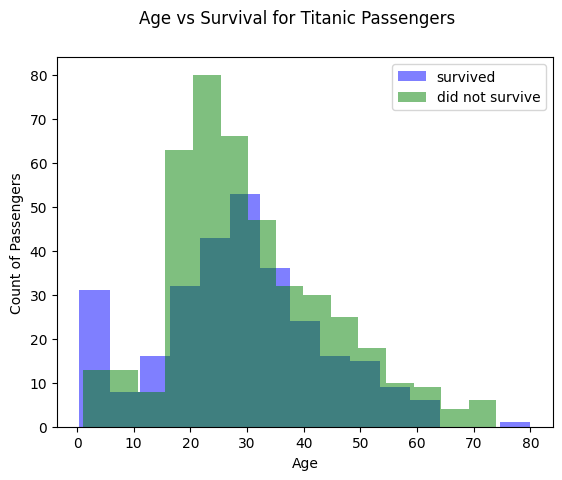

In [2]:
# Numeric vs Categorical EDA
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#Data Sourcing
dat = pd.read_csv('/content/titanic.csv')
print(dat.shape)

#Passenger ID isnt useful for analysis
dat.drop(labels = "PassengerId", axis= 1,inplace =True)
#We use age as one of the main examples, drop rows that miss age values
dat.dropna(subset=["Age"], inplace=True)

print(dat.shape)
# Numerical vs Categorical EDA

fig, ax= plt.subplots()
ax.hist(dat[dat["Survived"]==1]["Age"], bins=15, alpha = 0.5,color="blue", label="survived")
ax.hist(dat[dat["Survived"]==0]["Age"], bins=15, alpha = 0.5,color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of Passengers")

fig.suptitle("Age vs Survival for Titanic Passengers")
ax.legend()



<ipython-input-47-adb06b924b63>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dat[dat["Survived"]==1]["Age"],shade=True, color="blue", label="Survived", ax=ax)
<ipython-input-47-adb06b924b63>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dat[dat["Survived"]==0]["Age"],shade=True, color="green", label="Did not survive", ax=ax)


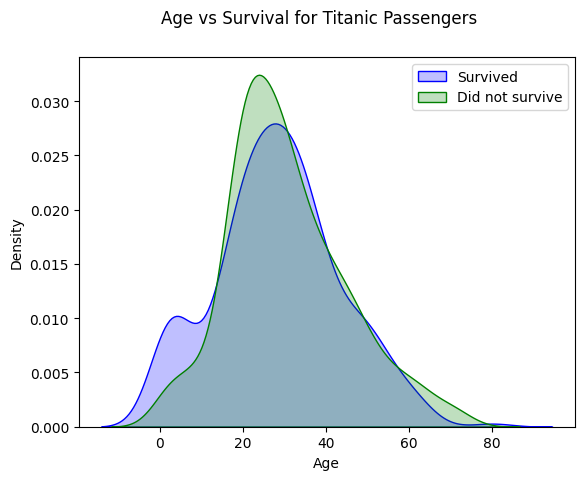

In [ ]:
fig,ax = plt.subplots()
sns.kdeplot(dat[dat["Survived"]==1]["Age"],shade=True, color="blue", label="Survived", ax=ax)
sns.kdeplot(dat[dat["Survived"]==0]["Age"],shade=True, color="green", label="Did not survive", ax=ax)
ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs Survival for Titanic Passengers")
ax.legend()



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
<ipython-input-51-083b0c03a8c1>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["did not survive","survived"])


Text(0.5, 0.98, 'Passenger Class vs Survival for Titanic Passengers')

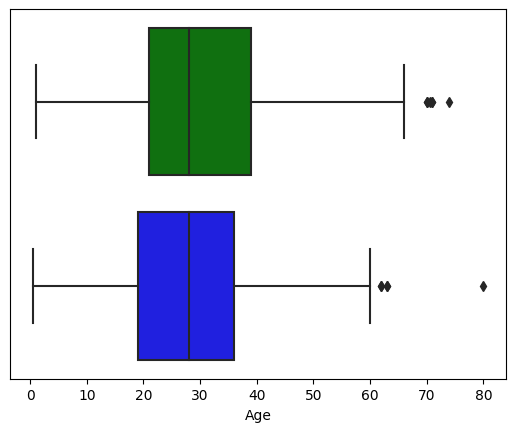

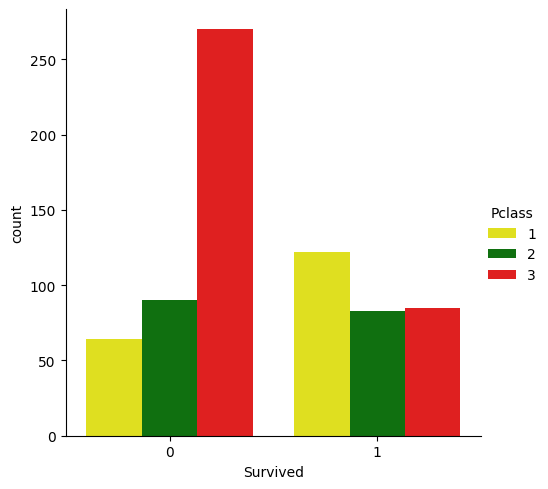

In [ ]:
figure, axis =plt.subplots()
sns.boxplot(x="Age", y="Survived", data = dat, orient="h",palette ={1:"blue",0:"green"},ax= axis)
axis.get_yaxis().set_visible(False)
fig.suptitle("Age vs Survival for Titanic Passengers")

color_patches= [
    Patch(facecolor="blue", label="Survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles= color_patches)

#2nd Example for Categorical vs categorical variables.
fig,ax = plt.subplots()
sns.catplot(x="Survived", hue="Pclass", data =dat,kind="count",palette= {1:"yellow",2:"green",3:"red"},ax=ax)
plt.close(2)

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive","survived"])
ax.set_xlabel("")

fig.suptitle("Passenger Class vs Survival for Titanic Passengers")

Categorical vs Categorical EDA





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Passenger Class vs Survival for Titanic Passengers')

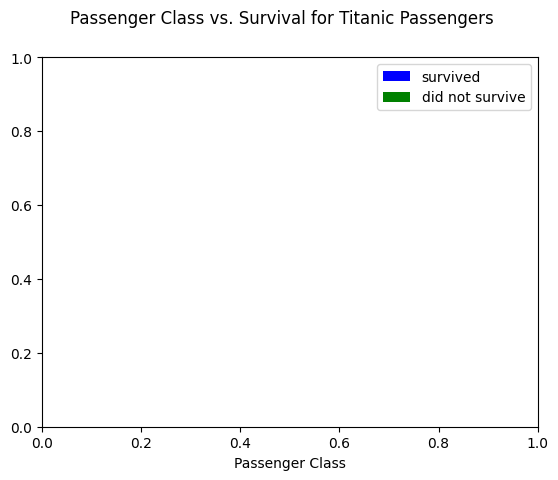

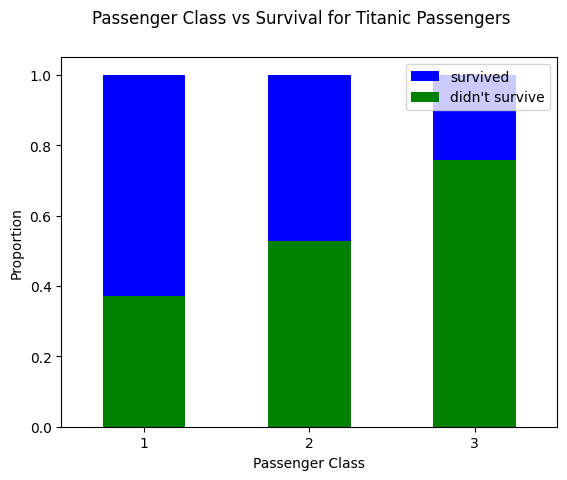

In [ ]:
# Categorical vs Categorical EDA
print("Categorical vs Categorical EDA\n\n\n")
fig, ax = plt.subplots()

sns.catplot(x="Pclass", hue="Survived", data=dat, kind="count",
            palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.set_xlabel("Passenger Class")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers")


#Stacked Bar Charts
#Create a dataframe with the counts by passenger class and survival
# ["Name"] could be any column within the data; it is the equivalent
# of COUNT(id) in SQL
counts_df = df.groupby(["Pclass", "Survived"])["Name"].count().unstack()
survived_percents_df = counts_df.T.div(counts_df.T.sum()).T #Transpose so survived + did not survive add up to 1, divide by the total number (transposed), then transpose one more time for plotting
fig,ax= plt.subplots()
survived_percents_df.plot(kind="bar", stacked= True, color=["green","blue"],ax =ax)

ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1,2,3], rotation = 0)
ax.set_ylabel("Proportion")
color_patches = [
    Patch(facecolor="blue", label ="survived"),
    Patch(facecolor="green", label ="didn't survive")
]
ax.legend(handles= color_patches)
fig.suptitle("Passenger Class vs Survival for Titanic Passengers")

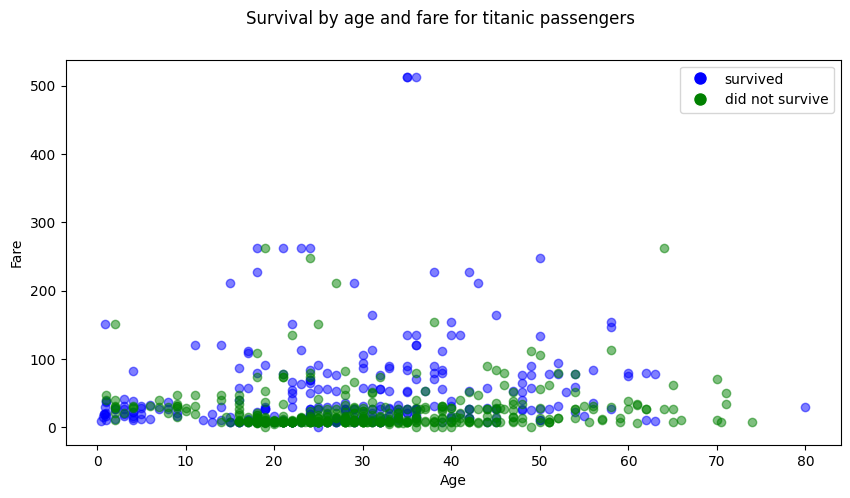

In [6]:
#numeric vs numeric eda
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(dat[dat["Survived"]==1]["Age"],dat[dat["Survived"]==1]["Fare"], c="blue", alpha=0.5)
ax.scatter(dat[dat["Survived"]==0]["Age"],dat[dat["Survived"]==0  ]["Fare"], c="green", alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='survived', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not survive', markerfacecolor='g', markersize=10)
]
ax.legend(handles= color_patches)
fig.suptitle("Survival by age and fare for titanic passengers");
